#### Importando as bibliotecas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("../alura-pandas-projeto-02/data/aluguel.csv",sep=';')
df.head()


In [ ]:
## Estutura do tipo dos dados.
type(df)


## Características gerais da base de dados

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

### Qual o valor médio de alguel por tipo de imóvel

In [ ]:
df.groupby('Tipo')['Valor'].mean()

In [ ]:
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

In [ ]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo

### Plotar os imóveis por diferentes tipos

In [ ]:
df_preco_tipo.plot(kind='barh', figsize=(14,10), color = 'purple');

### Remover os imóveis comerciais

In [ ]:
df.Tipo.unique()

In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro','Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial', 
                       'Box/Garagem','Chácara',
                       'Loteamento/Condomínio','Sítio',
                       'Pousada/Chalé',
                       'Hotel', 'Indústria']

In [ ]:
df.query('@imoveis_comerciais in Tipo')

In [ ]:
df = df.query('@imoveis_comerciais not in Tipo')
df.head()

In [ ]:
df.Tipo.unique()

In [ ]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

In [ ]:
df_preco_tipo.plot(kind='barh', figsize=(14,10), color = 'purple');

### Qual o percentual de cada tipo de imóvel na base de dados?

In [41]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [43]:
df.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [45]:
df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


### Plotar o gráfico entre tipo e valor por %

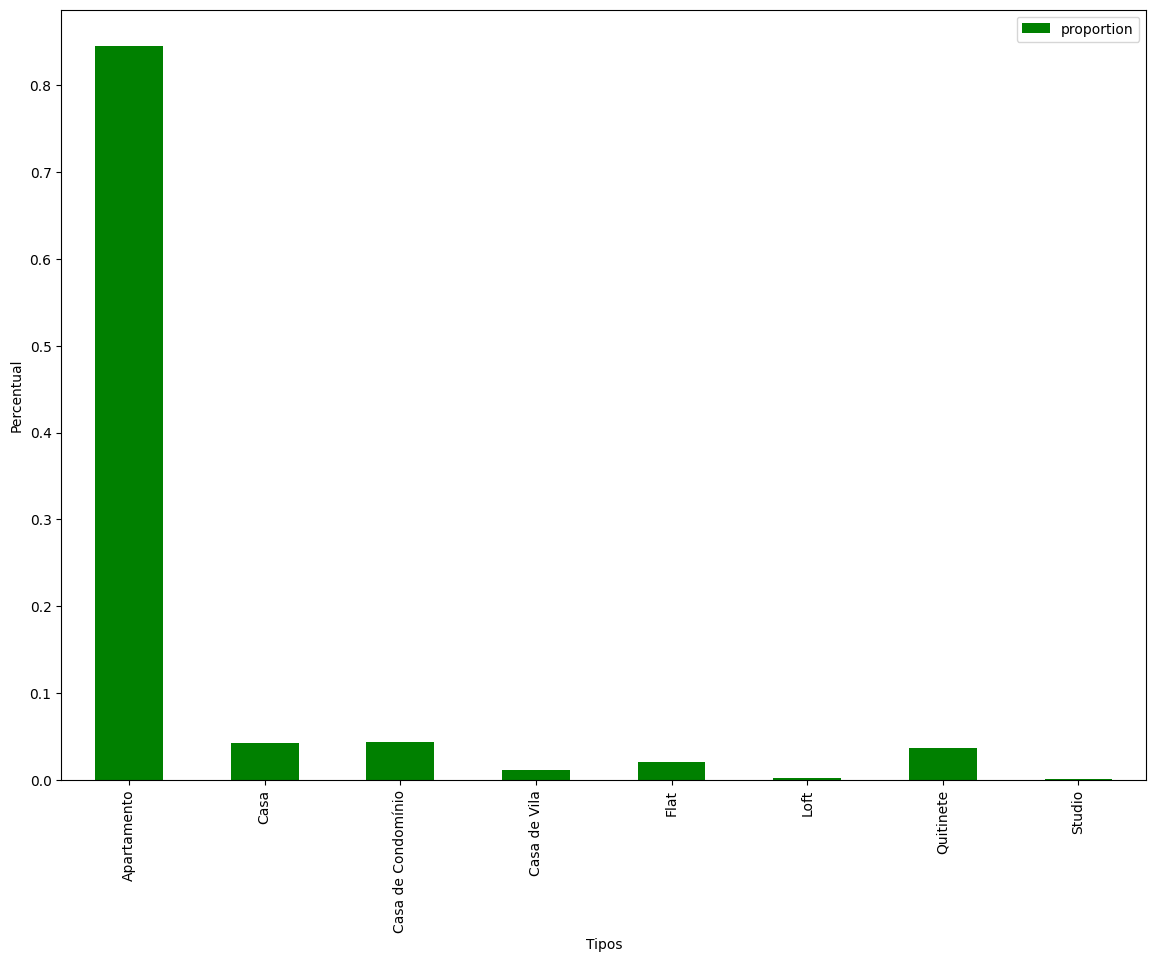

In [48]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

df_percentual_tipo.plot(kind='bar', figsize=(14,10), color = 'green',
                        xlabel= 'Tipos', ylabel= 'Percentual');

### Selecionar apenas os imóveis do tipo apartamento

In [49]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [51]:
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
